In [62]:
import clean, residual, run
import numpy as np
import matplotlib.pyplot as plt
import h5py
from math import acos, degrees, log
import imp
import re
from scipy import integrate
imp.reload(residual)
imp.reload(clean)

<module 'clean' from '/Users/MatthewMan/Desktop/UofA/Attenuation, Absorption, & Scattering/Analysis/clean.py'>

In [19]:
# Time residual is roughly the distribution with time of pulses on the PMT due to flashes of the POCAM.
# Since POCAM interval is 200000ns, time residuals will be distributed from 0 to 200000.
# attenuation length related to absorption and scattering lengths by:
#   1/att = 1/abs + 1/scatt

In [16]:
## Read the data
path = "Attenuation, Absorption, & Scattering/Data/DIONYSOS1/"
file_name = path + '20190430_144834_UTC_SDOM1_FLASH_DIONYSOS1_P1_blue_both_2500Hz_20V_60s_19120144844.hld_up.hdf5'

f = h5py.File(file_name, 'r')

atstamp = np.array(f['absolute_timestamp'])
r_0 = np.array(f['rising_0'])
r_1 = np.array(f['rising_1'])
r_2 = np.array(f['rising_2'])
r_3 = np.array(f['rising_3'])
f_0 = np.array(f['falling_0'])
f_1 = np.array(f['falling_1'])
f_2 = np.array(f['falling_2'])
f_3 = np.array(f['falling_3'])

f.close()



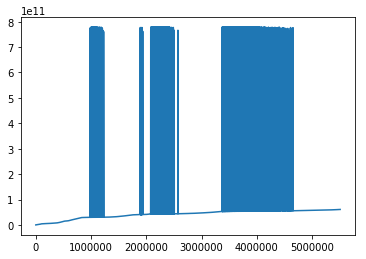

In [17]:
## Plot the data

fig, ax = plt.subplots()

ax.plot(atstamp)
#ax.set_xlabel('T/To')
#ax.set_ylabel('')
#ax.grid()
#plt.savefig('U_La=%i.png'%N,bbox_inches='tight')



In [50]:
np.random.choice([1,2,3,4],size=10, p=[.25,.25,.4,.09999999])

array([1, 2, 4, 4, 3, 3, 3, 1, 1, 2])

In [66]:
np.append(5,[1,1,1])[1:]

array([1, 1, 1])

Text(0.5,0,'time (ns)')

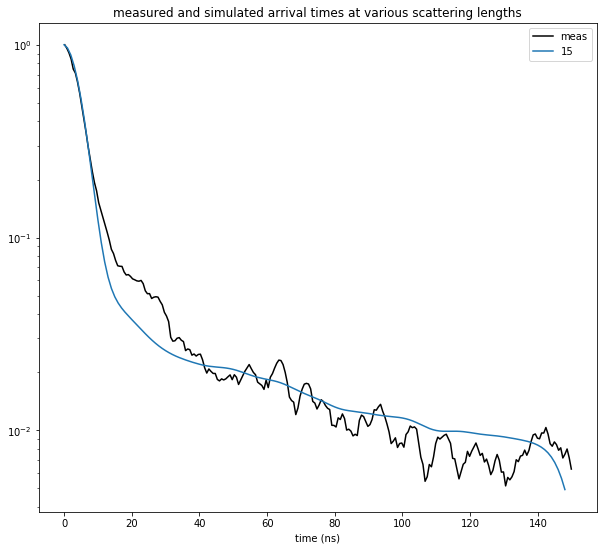

In [44]:
## compare simulation to data
from scipy.signal import savgol_filter

# Parameter selection
num_photons = 100000
abs_len = 80
#scatt_len = 15
eta = .2
colour = 'violet'
sDOM = 1

# loop over single paramter
scatt_len_list = [15]#np.arange(5,30,5)

file = "['P2'],['SDOM1'],up,violet,['20V'],['2500Hz'].csv"
path = 'Data/POSEIDON1/Measured_arrival_times/'
my_data = np.genfromtxt(path+file, delimiter=',')
#print(np.shape(my_data))

time = my_data[0][:]
counts = my_data[1][:]

# smoothing
smoothed = savgol_filter(counts,11,3)

keep = (time>=0) & (time<=150)
time = time[keep]
smoothed = smoothed[keep]

#normalize
smoothed = smoothed / np.max(smoothed)

fig, ax = plt.subplots(figsize=(10,9))
ax.semilogy(time, smoothed, color='k', label='meas')

# loop over simulations to optimize parameters
path_sim = 'Data/POSEIDON1/Simulated_arrival_times/'

for scatt_len in scatt_len_list:
    file = 'abs{:.1f}_scatt{:.1f}_eta{:.2f}_{}_sDOM{:d}_P2_photons{:d}.csv'.format(abs_len,scatt_len,eta,colour,sDOM,num_photons)
    sim_data = np.genfromtxt(path_sim+file, delimiter=',')
    
    sim_data = sim_data[1:] / np.max(sim_data) # normalize
    ax.semilogy(sim_data, label=str(scatt_len))
    
    # find R^2 value
    mean = np.mean(sim_data)
    tot = np.sum(np.power(sim_data-np.mean(sim_data), 2))
    interp = np.interp(np.arange(0,149),times,smoothed)
    res = np.sum(np.power(sim_data-interp, 2))
    r_sqr = np.append(r_sqr,1-res/tot)

ax.set_title('measured and simulated arrival times at various scattering lengths')
ax.legend()
ax.set_xlabel('time (ns)')
#tag = 'abs{:.1f}_scatt5to80_eta{:.2f}_{}_sDOM{:d}_P2_photons{:d}.png'.format(abs_len,eta,colour,sDOM,num_photons)
#plt.savefig('Data/POSEIDON1/Optimization/'+tag ,bbox_inches='tight')

# plot r_sqr values
fig, ax = plt.subplots(figsize=(10,9))
ax.plot(eta_list,r_sqr,marker='.')
ax.set_xlabel('eta')
ax.set_ylabel('R^2')
ax.set_title('Optimum eta')
plt.savefig('Data/POSEIDON1/Optimization/'+'optimize'+tag ,bbox_inches='tight')
    



In [26]:
abs_len_list = np.array([10,20])
popt_list = np.array([[]])
if popt_list.size == 0:
    print('hi')
popt_list = np.append(popt_list,[[4,5,6]],axis=1)
popt_list = np.append(popt_list,[[1,2,3]],axis=0)
popt_list = np.append(popt_list,[[1,2,3]],axis=0)
print(popt_list)

for (abs_len,params) in zip(abs_len_list,popt_list):
    print(np.append(abs_len,params))


hi
[[4. 5. 6.]
 [1. 2. 3.]
 [1. 2. 3.]]
[10.  4.  5.  6.]
[20.  1.  2.  3.]


In [27]:
np.delete([1,3,4,5], []) 

array([1, 3, 4, 5])

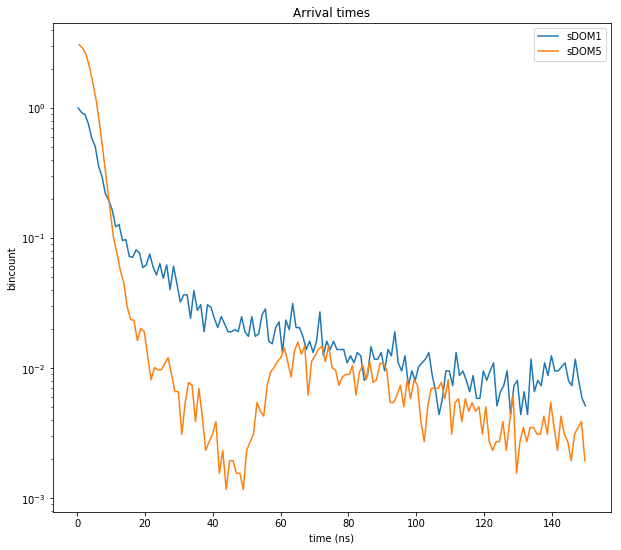

In [39]:
path_meas = 'Data/POSEIDON1/Measured_arrival_times/'
file = "['P2'],['SDOM1'],up,violet,['20V'],['2500Hz'].csv"
my_data = np.genfromtxt(path_meas+file, delimiter=',')
times = my_data[0][:]
counts = my_data[1][:]

keep = (times>=0) & (times<=150)
times = times[keep]
counts = counts[keep]
normalize = 1/np.max(counts)
counts = counts * normalize

fig, ax = plt.subplots(figsize=(10,9))
ax.semilogy(times, counts, label='sDOM1')


path_meas = 'Data/POSEIDON1/Measured_arrival_times/'
file = "['P2'],['SDOM5'],up,violet,['20V'],['2500Hz'].csv"
my_data = np.genfromtxt(path_meas+file, delimiter=',')
times = my_data[0][:]
counts = my_data[1][:]

keep = (times>=0) & (times<=150)
times = times[keep]
counts = counts[keep]
sDOM5_dist = np.sqrt( (107.66 - 69.10)**2 + 0) 
sDOM1_dist = np.sqrt( (107.66 - 69.79)**2 + 37**2)
dist_factor = (sDOM5_dist/sDOM1_dist)**2
exp_factor = np.exp(-sDOM1_dist)/np.exp(-sDOM5_dist)
counts = counts * normalize * dist_factor #* exp_factor


ax.semilogy(times, counts, label='sDOM5')

ax.set_title('Arrival times')
ax.set_xlabel('time (ns)')
ax.set_ylabel('bincount')
ax.legend()

In [4]:
filename = '20190426_085558_UTC_SDOM1_FLASH_POSEIDON1_P2_violet_both_2500Hz_20V_60s_19116085608.hld_up.hdf5'
a = clean.clean(filename)

percentage of high jumps in the file - 3.029756650211889


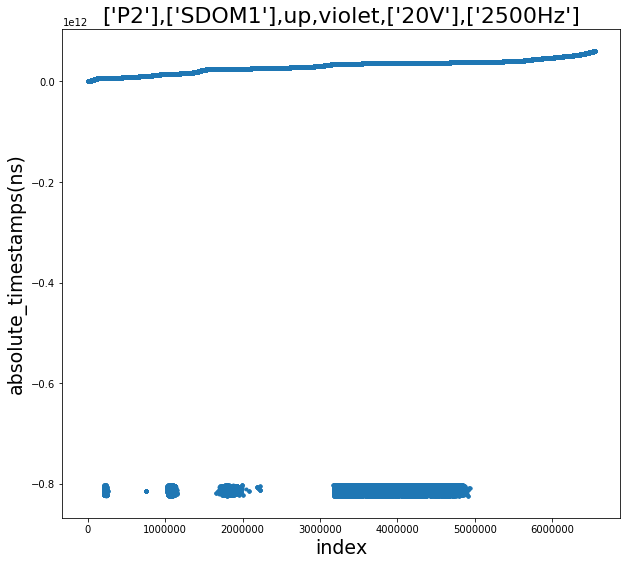

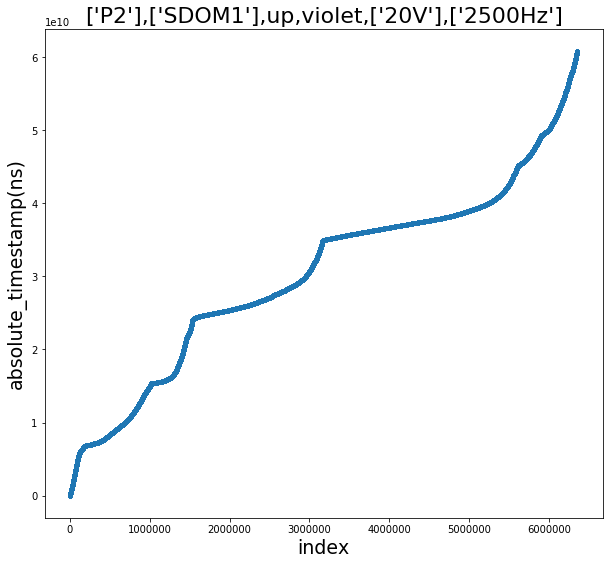

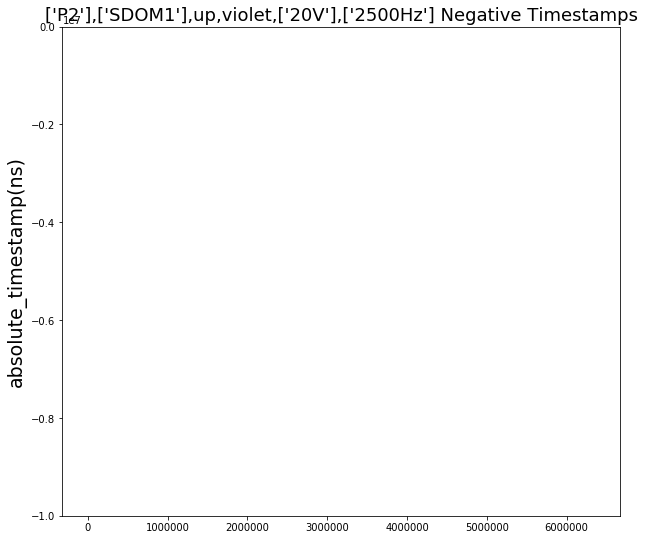

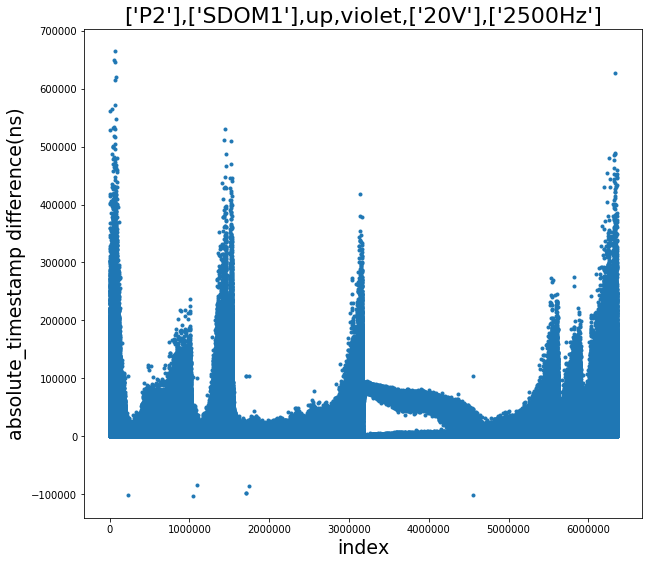

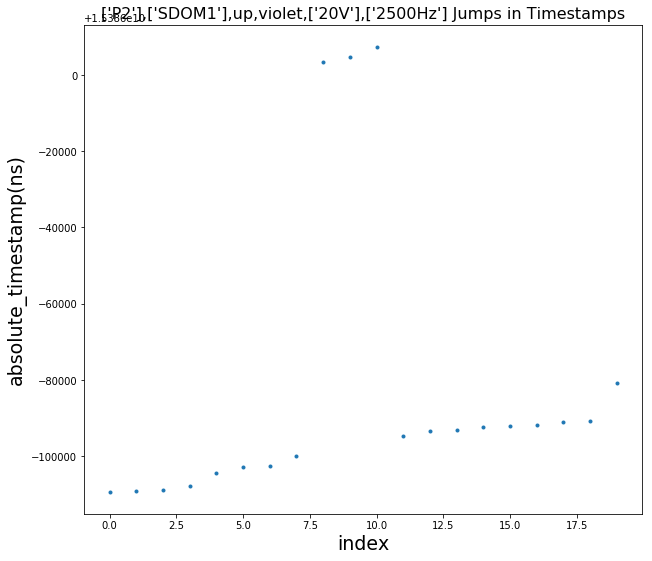

[ 230103.  230104. 1041308. 1041309. 1041310. 1101086. 1708941. 1708942.
 1713839. 1713840. 1749520. 1749521. 4548264. 4548265. 4548266.]


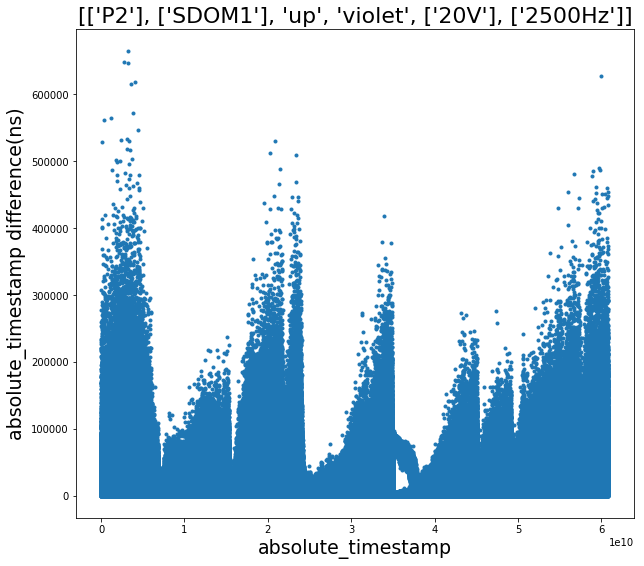

0.138071808682409


In [5]:
(abs_elim_3, rising_0_elim_3, rising_1_elim_3, rising_2_elim_3, rising_3_elim_3,
 falling_0_elim_3, falling_1_elim_3, falling_2_elim_3, falling_3_elim_3, POCAM_num, values,
atstamp, p_jumps, dt_mean, f_r, file_path, SDOM_num, PMT, sub_time_elim_3, sub_id_elim_3) = a.P_S_used()

/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))
/Users/MatthewMan/Desktop/UofA/Attenuation, Absorption, & Scattering/Analysis/residual.py:67: RuntimeWarning: Mean of empty slice.
  return np.sum((tres[selection]-tres[selection].mean())**2)
/Users/MatthewMan/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


400102.58792896156


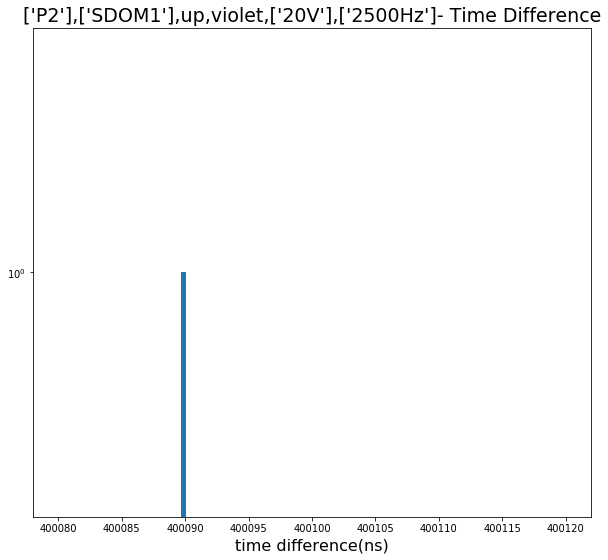

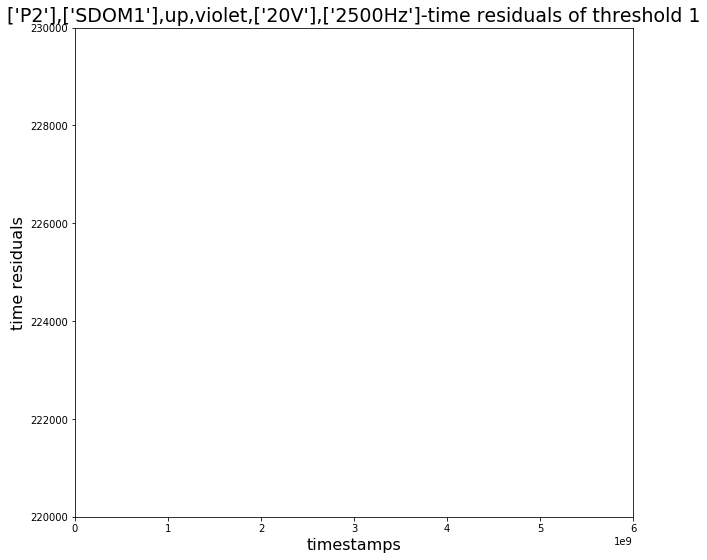

In [116]:
r1 = residual.residual(abs_elim_3,rising_3_elim_3,400080, 400120, 100, 
                                400095, 400105,
             0.0e10,0.6e10,220000, 230000, file_path, values, POCAM_num)

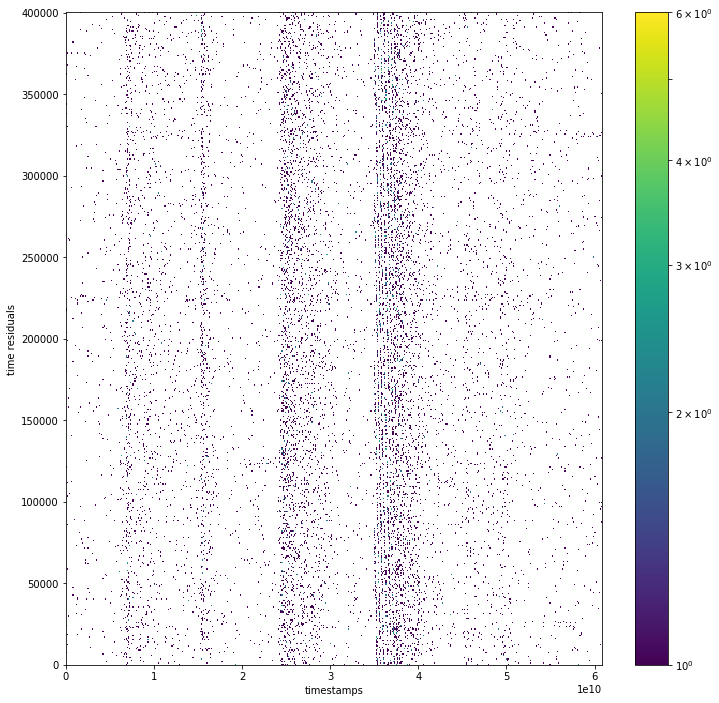

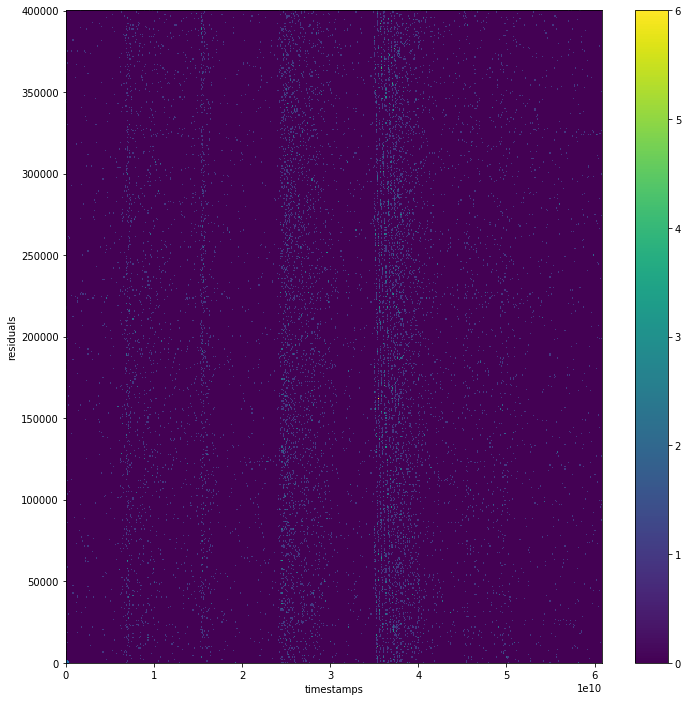

In [117]:
gaus_peak = 400100.7156722718
abs_elim, BinsHist, JumpIndex, xedges, yedges, POCAM_bins, POCAM_diff = r1.HIST2D(500, gaus_peak, SDOM_num)

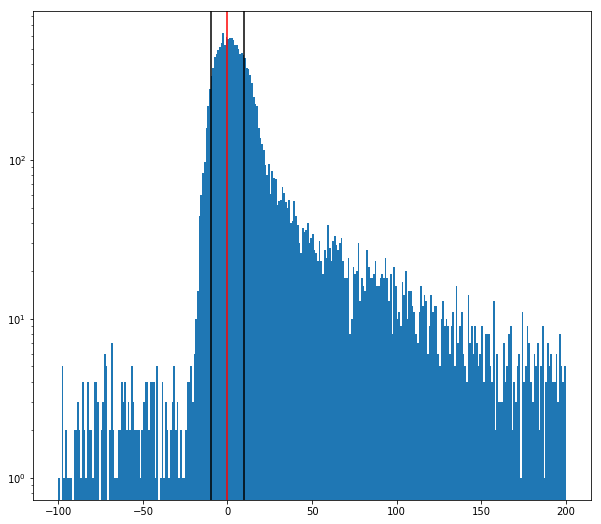

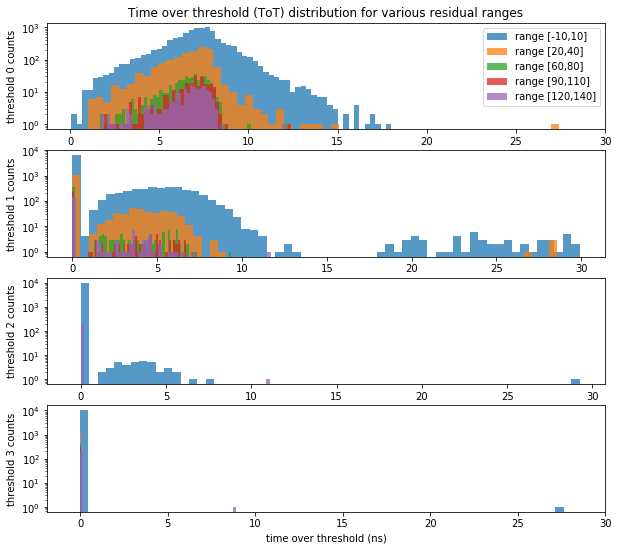

In [114]:
## ToT at various arrival time windows

# Slice a small time window
slice_range = [(abs_elim_3>4e10)&(abs_elim_3<5.5e10)]
my_slice = (abs_elim_3+rising_1_elim_3)[slice_range]
gaus_peak = 400100.7156722718
my_res = my_slice%gaus_peak
my_res = my_res - 223200

fig, ax = plt.subplots(figsize=(10,9))
n,bins,patches = ax.hist(my_res,bins=300,log=True, range=(-100,200) )
ax.axvline(color='r')
ax.axvline(-10,color='k')
ax.axvline(10,color='k')

# slice ToT within time window
ToT = np.array([[falling_0_elim_3 - rising_0_elim_3],
                [falling_1_elim_3 - rising_1_elim_3],
                [falling_2_elim_3 - rising_2_elim_3],
                [falling_3_elim_3 - rising_3_elim_3]])
ToT = ToT[:,slice_range]

# residue slice range list
res_slice_list = [(-10,10),(20,40),(60,80),(90,110),(120,140)]

fig, ax = plt.subplots(nrows=4,figsize=(10,9))

for slice_range in res_slice_list:
    lbound,ubound = slice_range
    res_slice = (my_res>lbound)&(my_res<ubound)
    ToT_slice = ToT[:,res_slice]
    for i in range(4):
        label = 'range [%d,%d]'%(lbound,ubound)
        ax[i].hist(ToT_slice[i,:],bins=60,alpha=.75,label=label,log=True)

# plot results
ax[3].set_xlabel('time over threshold (ns)')
ax[0].set_title('Time over threshold (ToT) distribution for various residual ranges')
ax[0].legend()
for i in range(4):
    ax[i].set_xticks([0,5,10,15,20,25,30])
    ax[i].set_ylabel('threshold %i counts'%i)

plt.savefig('Data/POSEIDON1/testing/ToT_distribution.png',bbox_inches='tight')
    


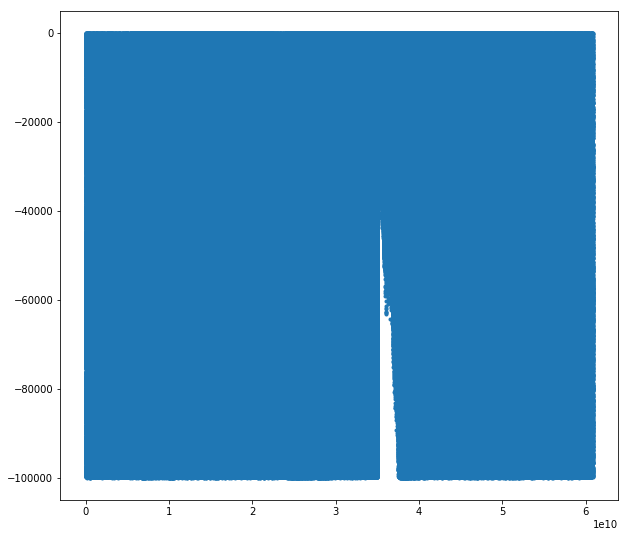

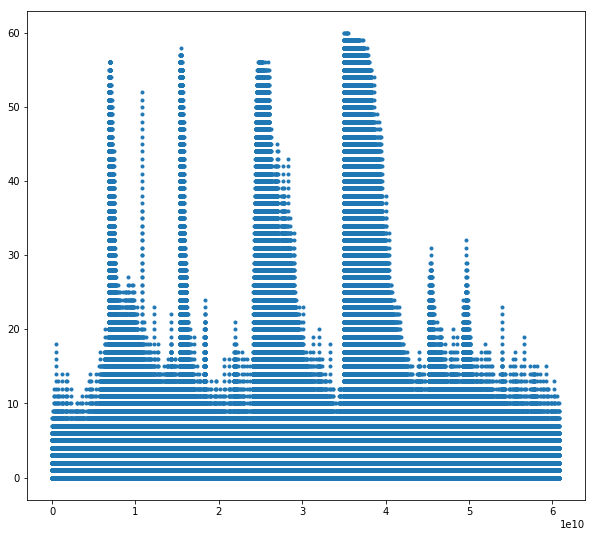

In [6]:
#fig, ax = plt.subplots(figsize=(10,9))
#ax.scatter(abs_elim_3,sub_time_elim_3)
#fig, ax = plt.subplots(figsize=(10,9))
#ax.scatter(abs_elim_3,sub_id_elim_3)

fig, ax = plt.subplots(figsize=(10,9))
ax.plot(abs_elim_3,sub_time_elim_3, marker='.',linestyle='')
fig, ax = plt.subplots(figsize=(10,9))
ax.plot(abs_elim_3,sub_id_elim_3, marker='.',linestyle='')

In [22]:
print(len(a.atstamp)-len(sub_id_elim_3))
print(len(a.atstamp)-len(a.sub_id))
print(sub_id_elim_3[0:30])
#print(np.diff(abs_elim_3[0:40]))
np.min(sub_time_elim_3)


207397
0
[0 1 2 3 0 1 0 1 2 0 1 0 1 0 1 2 0 0 1 2 0 1 0 1 0 1 2 3 0 0]


-99988.89844

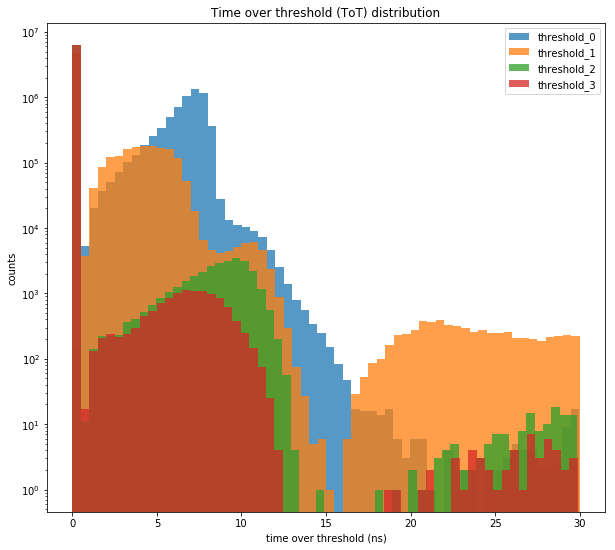

In [66]:
# ToT distributions
width0 = falling_0_elim_3 - rising_0_elim_3
width1 = falling_1_elim_3 - rising_1_elim_3
width2 = falling_2_elim_3 - rising_2_elim_3
width3 = falling_3_elim_3 - rising_3_elim_3
fig, ax = plt.subplots(figsize=(10,9))
ax.hist(width0,bins=60,alpha=.75, label='threshold_0',log=True)
ax.hist(width1,bins=60,alpha=.75, label='threshold_1',log=True)
ax.hist(width2,bins=60,alpha=.75, label='threshold_2',log=True)
ax.hist(width3,bins=60,alpha=.75, label='threshold_3',log=True)
ax.set_xlabel('time over threshold (ns)')
ax.set_ylabel('counts')
ax.set_title('Time over threshold (ToT) distribution')
#ax.set_xlim(0,15)
ax.legend()

For events that correspond to direct photons from the POCAM flashes, I want to know the ToT (distribution), compared to the ToT distr of (scattered) photons in the tail of the arrival time distribution. 
This will give an idea of the number of photons hitting the PMT. If the ToT is much longer for direct photons, then there are more photons we need to account for. But if they are similar, then we don't need to change anything.

Then we'd also like to compare the arrival times of events that cross threshold_3 with those that cross threshold_1. If these thresholds both give compatible shapes ...


(array([1. , 0. , 3. , 0. , 0. , 5. , 0. , 3. , 0. , 2.5]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

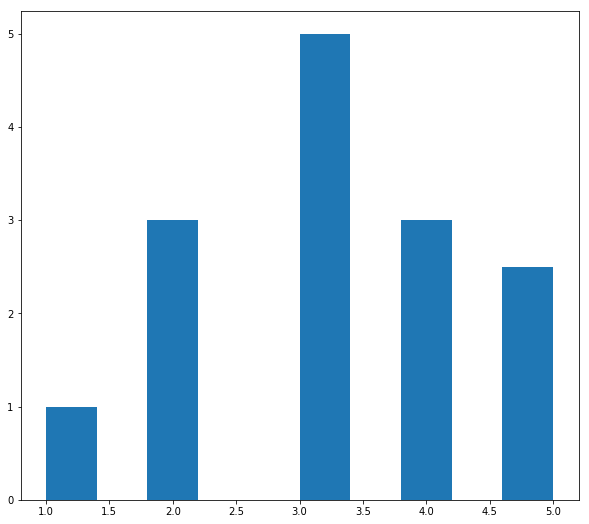

In [121]:
my_data = np.array([1,2,3,4,5,2,2,4,3,3,4,3,3])
#weights = np.array([2 if i>=5 else 1 for i in my_data])
#print(weights)
weights = np.array([1,1,1,1,2.5,1,1,1,1,1,1,1,1])

fig, ax = plt.subplots(figsize=(10,9))
ax.hist(my_data,weights=weights)

In [7]:
30856399648.40729/3e10

1.0285466549469098

Questions for Christian Fruck (or others in Munich team):

What is a subevent? How does the data acquisition system interpret threshold crossings within a single event?

What's the cause of the jumps in timestamp, jumps in time residuals, negative timestamps, negative ToT, etc.?

What are the exact uncertainty values? I should look more closely at the POCAM and sDOM calibration to see if I can get the uncertainty out of it (expecting ~5%).


Other things to look at:

sDOM5 may be saturating, which could explain the low # of counts. To test this, see how many threshold_3 crossings and the ToT_3 for sDOM5 compared to sDOM1/2/3. If sDOM5 keeps crossing threshold_3 it could be saturating.

To get an idea of the variation of the POCAM, try extrapolating the total number of photons emitted (roughly the y-intercept of my att_len fits) and that should be consistent over time. Will need to consider things like attenuation length changing too, and different run_times/flasher frequencies between runs, but that's the idea.

Try looking at threshold_0 instead of 1.

IMPORTANT: sum over chi_squared of multiple baselines, and plot this over all parameters. Then minimize this using package iminuit to find global minimum.


In [ ]:
## interpolate between simulations

# Input: simulation parameters
# Output: likelihood between sim and data
#def my_func(abs_len, eff_scatt_len, eta):

colour = 'violet'

eta_list = np.arange(.5,0.71,.1)

if colour == 'violet':
    popt_array = np.load('Data/Simulated_arrival_times/violet/popt_array_(abs,eta,scatt,popt)_final.npy') #sDOM1
    scatt_len_list = np.arange(25,46,10) # violet
    abs_len_list = np.arange(25,46,10)
elif colour == 'blue':
    #popt_array = np.load('Data/Simulated_arrival_times/blue/popt_array_(abs,eta,scatt,popt)_P2_sDOM1_final.npy')
    scatt_len_list = np.arange(45,66,10)
    abs_len_list = np.arange(25,46,10)
else: # uv
    #popt_array = np.load('Data/Simulated_arrival_times/uv/popt_array_(abs,eta,scatt,popt)_P2_sDOM5.npy')
    scatt_len_list = np.arange(15,36,10)
    abs_len_list = np.arange(20,41,10)
    
# interpolator
a_array = popt_array[:,:,:,1]
k1_array = popt_array[:,:,:,2]
k2_array = popt_array[:,:,:,3]

f_a = RegularGridInterpolator((abs_len_list,eta_list,scatt_len_list),a_array)
f_k1 = RegularGridInterpolator((abs_len_list,eta_list,scatt_len_list),k1_array)
f_k2 = RegularGridInterpolator((abs_len_list,eta_list,scatt_len_list),k2_array)

In [ ]:
## fit sim to meas but interpolate instead of simulating each time.

def simultaneuous_fit_2(abs_len, eff_scatt_len, eta):
    # Parameters
    num_photons = 1000000
    colour = 'violet'
    save_path = 'Data/Simulated_arrival_times/violet/'
    sDOM_list = [1,2] # [5,1,2,3]
    avg_cos = (1-eta)*.924
    scatt_len = eff_scatt_len*(1-avg_cos)
    print(abs_len, eff_scatt_len, eta) # for testing
    
    chi_sqr_total = 0
    
    for sDOM in sDOM_list:
        # measurement
        path_meas = 'Data/POSEIDON1/%s/Measured_arrival_times/'%colour
        file = "['P2'],['SDOM%i'],up,%s,['20V'],['2500Hz'],corrected.csv"%(sDOM,colour) 
        my_data = np.genfromtxt(path_meas+file, delimiter=',')
        counts_corrected = my_data[1][:]
        counts_slice = counts_corrected[100:(100+139)] # same length as sim_data_slice
        
        # simulation
        arr_time = simulation(num_photons, abs_len, scatt_len, eta, colour, sDOM, save_path, save_results=False)
        sim_data_slice = arr_time[1:-10] # remove edge effects
        sim_data = sim_data_slice/np.sum(sim_data_slice)*np.sum(counts_slice) # normalize to integrated count of meas
        
        # chi squared 
        #chisqr,p = chisquare(counts_slice,sim_data,ddof=3)
        #chisqr = binned_likelihood(counts_slice, sim_data)
        chisqr = likelihood_ratio(counts_slice, sim_data)
        chi_sqr_total += chisqr
    
    print(chi_sqr_total)
    return chi_sqr_total


    

In [ ]:
def likelihood_ratio(f_obs, f_exp):
    cost = 2*np.sum(f_exp - f_obs + f_obs*np.log(f_obs/f_exp))
    return cost

In [ ]:
m = Minuit(simultaneuous_fit_2, abs_len=20, eff_scatt_len=50, eta=.6, 
           error_abs_len=3, error_eff_scatt_len=5, error_eta=.05,
           limit_abs_len=(5, None), limit_eff_scatt_len=(5, None), limit_eta=(0, 1),
           errordef=.5) #error_abs_len=3, error_eff_scatt_len=5, error_eta=.05,

print('Run optimiser')
m.migrad()  # run optimiser
#print(m.values)
pprint(m.get_param_states())
print('fmin')
pprint(m.get_fmin())

In [77]:
# new scattering angle distribution (clear deep ocean water instead of turbid harbour water)

angle = np.array([1.0000E-01, 1.2589E-01, 1.5849E-01, 1.9953E-01, 2.5119E-01, 3.1623E-01, 3.9811E-01, 5.0119E-01, 6.3096E-01, 7.9433E-01,
                  1.0000E00, 1.2589E00, 1.5849E00, 1.9953E00, 2.5119E00, 3.1623E00, 3.9811E00, 5.0119E00, 6.3096E00, 7.9433E00, 1.0000E01,
                  1.5000E01, 2.0000E01, 2.5000E01, 3.0000E01, 3.5000E01, 4.0000E01, 4.5000E01, 5.0000E01, 5.5000E01, 6.0000E01, 6.5000E01,
                  7.0000E01, 7.5000E01, 8.0000E01, 8.5000E01, 9.0000E01, 9.5000E01, 1.0000E02, 1.0500E02, 1.1000E02, 1.1500E02, 1.2000E02,
                  1.2500E02, 1.3000E02, 1.3500E02, 1.4000E02, 1.4500E02, 1.5000E02, 1.5500E02, 1.6000E02, 1.6500E02, 1.7000E02, 1.7500E02,
                  1.8000E02])

sigma_8 = np.array([5.3182E01, 4.0424E01, 3.0727E01, 2.3735E01, 1.8141E01, 1.3598E01, 9.9536E00, 7.1793E00, 5.1100E00, 3.5911E00, 2.4976E00,
                    1.7191E00, 1.1710E00, 7.7576E-01, 5.0866E-01, 3.3399E-01, 2.1960E-01, 1.4459E-01, 9.5219E-02, 6.2816E-02, 4.1620E-02,
                    2.0375E-02, 1.0990E-02, 6.1656E-03, 3.8877E-03, 2.6802E-03, 1.8991E-03, 1.3717E-03, 1.0196E-03, 7.6833E-04, 6.0280E-04,
                    4.8832E-04, 4.0688E-04, 3.4571E-04, 3.0191E-04, 2.6810E-04, 2.4593E-04, 2.3152E-04, 2.2394E-04, 2.2254E-04, 2.2393E-04,
                    2.2651E-04, 2.3392E-04, 2.5050E-04, 2.6290E-04, 2.6615E-04, 2.7488E-04, 2.8957E-04, 3.0882E-04, 3.3044E-04, 3.6268E-04,
                    4.0732E-04, 4.6710E-04, 4.8450E-04, 5.0190E-04])

sigma_9 = np.array([7.5181E01, 5.6404E01, 4.2318E01, 3.2379E01, 2.4458E01, 1.8039E01, 1.2885E01, 9.0697E00, 6.3271E00, 4.3741E00, 2.9964E00,
                    2.0339E00, 1.3679E00, 9.0011E-01, 5.8691E-01, 3.8249E-01, 2.4913E-01, 1.6219E-01, 1.0552E-01, 6.8616E-02, 4.4602E-02,
                    2.0871E-02, 1.1988E-02, 7.0743E-03, 4.2671E-03, 2.8615E-03, 1.9990E-03, 1.4354E-03, 1.0695E-03, 8.1689E-04, 6.4576E-04,
                    5.2780E-04, 4.3685E-04, 3.6098E-04, 3.0890E-04, 2.7117E-04, 2.4592E-04, 2.2817E-04, 2.1893E-04, 2.1753E-04, 2.1892E-04,
                    2.2163E-04, 2.2891E-04, 2.4411E-04, 2.5689E-04, 2.6476E-04, 2.7486E-04, 2.8622E-04, 3.0180E-04, 3.1644E-04, 3.4665E-04, 
                    3.9514E-04, 4.6697E-04, 4.8702E-04, 5.0708E-04])

# scattering coefficients at 530nm for station 8&9 and pure seawater (m^-1)
b_8 = .037289
b_9 = .042587
b_w = .00231


def molecular_scatt(x):
    beta = 0.06225 * (1 + 0.835 * np.cos(np.radians(x))*np.cos(np.radians(x)))
    return beta

# normalized volume scattering functions (vsf)
molecular_vsf = molecular_scatt(angle)
vsf_9 = sigma_9/b_9
vsf_8 = sigma_8/b_8



In [78]:
## old particle vsf
particle_phase = [1.76661e3,
                          1.29564e3,
                          9.50172e2,
                          6.99092e2,
                          5.13687e2,
                          3.76373e2,
                          2.76318e2,
                          2.18839e2,
                          1.44369e2,
                          1.02241e2,
                          7.16082e1,
                          4.95803e1,
                          3.39511e1,
                          2.28129e1,
                          1.51622e1,
                          1.00154e1,
                          6.57957,
                          4.29530,
                          2.80690,
                          1.81927,
                          1.15257,
                          4.89344e-1,
                          2.44424e-1,
                          1.47151e-1,
                          8.60848e-2,
                          5.93075e-2,
                          4.20985e-2,
                          3.06722e-2,
                          2.27533e-2,
                          1.69904e-2,
                          1.31254e-2,
                          1.04625e-2,
                          8.48826e-3,
                          6.97601e-3,
                          5.84232e-3,
                          4.95306e-3,
                          4.29232e-3,
                          3.78161e-3,
                          3.40405e-3,
                          3.11591e-3,
                          2.91222e-3,
                          2.79696e-3,
                          2.68568e-3,
                          2.57142e-3,
                          2.47603e-3,
                          2.37667e-3,
                          2.32898e-3,
                          2.31308e-3,
                          2.36475e-3,
                          2.50584e-3,
                          2.66183e-3,
                          2.83472e-3,
                          3.03046e-3,
                          3.09206e-3,
                          3.15366e-3]

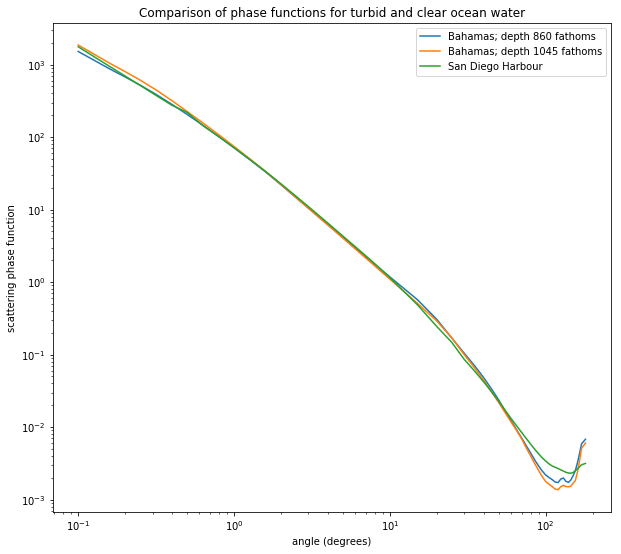

In [80]:
vsf_9_particle = (vsf_9 - (b_w/b_9)*molecular_vsf)*b_9/(b_9-b_w)
vsf_8_particle = (vsf_8 - (b_w/b_8)*molecular_vsf)*b_8/(b_8-b_w)

fig, ax = plt.subplots(figsize=(10,9))
ax.loglog(angle, vsf_8_particle, label='Bahamas; depth 860 fathoms')
ax.loglog(angle, vsf_9_particle, label='Bahamas; depth 1045 fathoms')
ax.loglog(angle, particle_phase, label='San Diego Harbour')
ax.set_title('Comparison of phase functions for turbid and clear ocean water')
ax.set_ylabel('scattering phase function')
ax.set_xlabel('angle (degrees)')
ax.legend()
plt.savefig('comparison_of_phase_functions.png',bbox_inches='tight')


In [19]:
b_w/b_9

0.05499999999999999

In [28]:
b_w/b_8

0.06194856391965459

In [29]:
b_w_400 = 75.5e-4
b_violet = 1/35
eta_ = b_w_400/b_violet
print(eta_)

0.26425000000000004


In [31]:
b_w_400

0.00755

In [32]:
.06/b_w_400

7.947019867549669

In [46]:
## Attenuation, scattering, and absorption

# example values for now
eta = 0.15
scatt_len = 8
abs_len = 18.4

avg_cos = (1-eta)*0.924 #average cosine of the scattering angle
eff_scatt = scatt_len/(1-avg_cos)
eff_scatt_ln = -scatt_len/np.log(avg_cos)
print('eff_scatt: ', eff_scatt)
print('eff_scatt_ln: ', eff_scatt_ln)

eff_att_len_theoretical = 1 / (1/eff_scatt + 1/abs_len)
att_len_theor = 1 / (1/scatt_len + 1/abs_len)
print('eff_att_len: ',eff_att_len_theoretical)
print('att_len: ',att_len_theor)

print('avg_cos: ',avg_cos)

eff_scatt:  37.27865796831314
eff_scatt_ln:  33.117772945341734
eff_att_len:  12.319393671581032
att_len:  5.575757575757575
avg_cos:  0.7854


In [43]:
## average cos of vsf
## Note for vsf in San Diego harbour, avg_cos is .922 as calculated by Kirk

eta_9 = b_w/b_9
eta_8 = b_w/b_8

# average cos for total vsf, from Kirk
avg_cos_9 = .885
avg_cos_8 = .867

# particulate vsf
avg_cos_p_9 = avg_cos_9/(1-eta_9)
avg_cos_p_8 = avg_cos_8/(1-eta_8)

print(avg_cos_p_9)
print(avg_cos_p_8)


0.935757256002185
0.9242563538122874


In [44]:
.64/.00755

84.7682119205298

In [58]:
eta = .25
eff_scatt_len = 28
avg_cos = (1-eta)*.924
scatt_len = eff_scatt_len*(1-avg_cos)
print(scatt_len)

8.595999999999998


In [66]:
y = np.sin(np.deg2rad(angle))*sigma_8
a = 2*np.pi*integrate.trapz(y,angle)
print(a)

2.0751846386645028


In [73]:
np.random.exponential(35)

44.165063879078104

In [75]:
wavelength = np.array([350, 366, 375, 400, 425, 450, 475])
b_w = 1e-4*np.array([134.5, 110.8, 99.8, 75.5, 58.1, 45.4, 35.9])

my_wavelengths = [365, 405, 465]

y = np.interp(my_wavelengths, wavelength, b_w)
print(y)

[0.01122812 0.007202   0.00397   ]
